Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

Load any photo

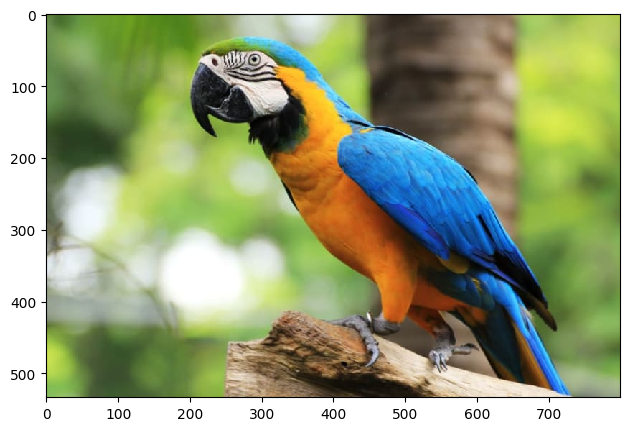

In [2]:
io.imshow("assets/macaw_bird.png")

In [3]:
img = io.imread("assets/macaw_bird.png")  # storing image as an array

In [4]:
# normalisation
norm_img = np.array(img, dtype = np.float64) / 255
norm_img.shape

(534, 800, 3)

In [5]:
# visualization of pixel values
data = norm_img.reshape(-1,3)
dataframe = pd.DataFrame(data=data[0:, 0:], columns=['R', 'G', 'B'])
dataframe.head()

,R,G,B
0,0.364706,0.501961,0.235294
1,0.360784,0.498039,0.231373
2,0.352941,0.490196,0.223529
3,0.345098,0.482353,0.215686
4,0.341176,0.478431,0.219608


In [6]:
# after reshaping
data.shape  # 534x800x3 ==> 427200x3

(427200, 3)

In [7]:
# number of colors in the image
dataframe.drop_duplicates().shape

(127183, 3)

Now, finally compressing the image using sklearn's kmeans

In [8]:
# compressing the image with 128 colors
n_colors = 128 
kmeans = KMeans(n_clusters = n_colors, random_state= 42)
kmeans.fit(data)

KMeans(n_clusters=128, random_state=42)

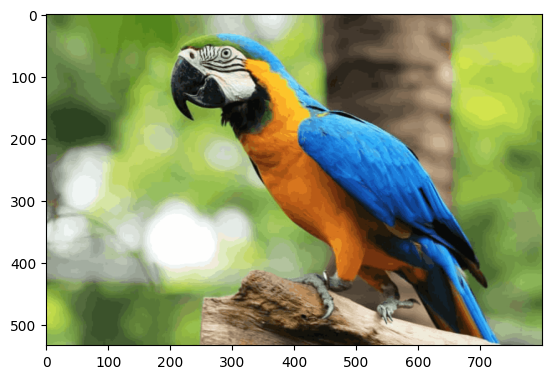

In [9]:
img128 = kmeans.cluster_centers_[kmeans.labels_]
img128 = img128.reshape(img.shape)
plt.imshow(img128)

In [10]:
# visualization of pixels after compression
data128 = img128.reshape(-1,3)
dataframe128 = pd.DataFrame(data=data128[0:, 0:], columns=['R', 'G', 'B'])
dataframe128.head()

,R,G,B
0,0.377613,0.505474,0.220924
1,0.377613,0.505474,0.220924
2,0.345405,0.467435,0.219601
3,0.345405,0.467435,0.219601
4,0.345405,0.467435,0.219601


In [11]:
# number of colors in compressed image
dataframe128.drop_duplicates().shape

(128, 3)

In [12]:
# Now, let's do the compression again but with 64 colors
k_means = KMeans(n_clusters = 64, random_state = 42).fit(data)
img64 = k_means.cluster_centers_[k_means.labels_]
img64 = img64.reshape(img.shape)

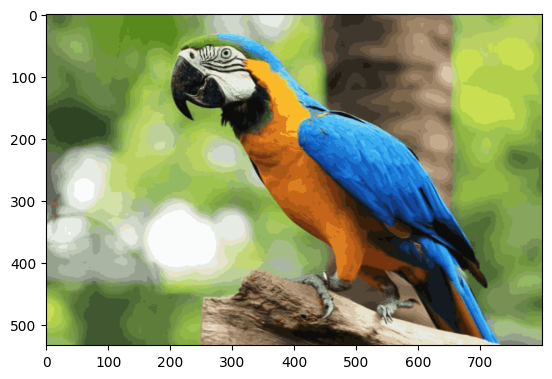

In [13]:
plt.imshow(img64)

Displaying all 3 images

(-0.5, 799.5, 533.5, -0.5)

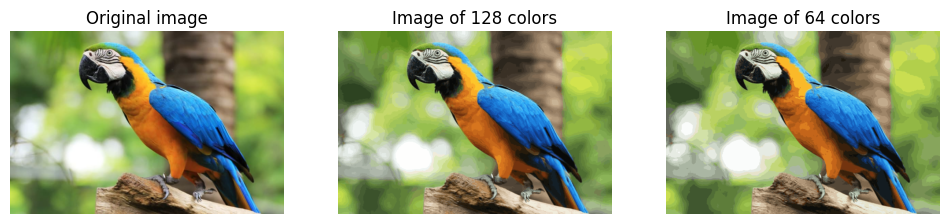

In [14]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.set_title('Original image')
ax1.axis('off')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img128)
ax2.set_title('Image of 128 colors')
ax2.axis('off')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img64)
ax3.set_title('Image of 64 colors')
ax3.axis('off')

In [ ]:
plt.imsave("output/macaw_bird_orig.png", img)
plt.imsave("output/macaw_bird_128.png", img128)
plt.imsave("output/macaw_bird_64.png", img64)